In [2]:
import nltk
import matplotlib.pyplot as plt
import numpy
from nltk.corpus import twitter_samples
import random
import numpy as np
import math as m

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/adithyashanker/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adithyashanker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# use predefined function ‘fileids()’ to see the content
twitter_samples.fileids()
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
import re
import string                              # for string operations

stop_words = stopwords.words('english')
punctuation = string.punctuation
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

tweets = all_positive_tweets + all_negative_tweets ## Concatenate the lists. 
labels = np.append(np.ones((len(all_positive_tweets),1)), np.zeros((len(all_negative_tweets),1)), axis = 0)

train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]
train_x = train_pos + train_neg 
train_y = np.append(np.ones(len(train_pos)), np.zeros(len(train_neg)), axis=0).reshape(-1)


test_pos  = all_positive_tweets[1000:]
test_neg  = all_negative_tweets[1000:]
test_x = test_pos + test_neg
test_y = np.append(np.ones(len(test_pos)),np.zeros(len(test_neg)), axis=0)



In [5]:
def preprocess(tweet) :
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    stemmer = PorterStemmer()
    tweet_tokens = tokenizer.tokenize(tweet)
    cleaned_stemmed_tweet = []
    for token in tweet_tokens:
        if token not in stop_words and token not in punctuation :
            cleaned_stemmed_tweet.append(stemmer.stem(token))
    return cleaned_stemmed_tweet



In [6]:


def buildCooccurenceMatrix(corpus, word, k):
    Matrix = {}

    for text in corpus:
        text_split = text.split(" ")
        for i in range(len(text_split)) :
            if text_split[i]!= word :
                if text_split[i] not in Matrix:
                    Matrix[text_split[i]] = 0
                j = i+1
                while j<=i+k and j<len(text_split):
                    if text_split[j] == word:
                        Matrix[text_split[i]]+=1
                        #print(f'{text_split[i]} loop 1 {Matrix[text_split[i]]}')
                    j+=1

            else :
                j = i+1
                while j<=i+k and j<len(text_split):
                    if text_split[j] not in Matrix:
                        Matrix[text_split[j]] = 1
                        print(text_split[j])
                    else:
                        Matrix[text_split[j]] += 1
                        print(text_split[j])

                    j+=1
    return Matrix


            



In [7]:
corpus = ['I like simple data', 'I prefer simple raw data']
print(buildCooccurenceMatrix(corpus,"data", 3))

{'I': 1, 'like': 1, 'simple': 2, 'prefer': 1, 'raw': 1}


In [8]:
def EuclideanDistance(v1,v2) :
    return np.linalg.norm(v1-v2)

In [9]:
def cosineSimilarity(v1, v2):
    return (v1@v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [10]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

/Users/adithyashanker/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


243

In [11]:
def vectorize(word, word_embeddings=word_embeddings):
    return word_embeddings[word]

[[-0.13964844  0.06225586 -0.27929688 ...  0.20410156  0.23535156
  -0.05102539]
 [-0.16113281  0.10546875 -0.13867188 ...  0.25585938  0.20214844
  -0.01928711]
 [-0.0005188   0.16015625  0.0016098  ... -0.03540039  0.08886719
  -0.30273438]
 ...
 [ 0.02978516  0.25585938  0.23925781 ... -0.06030273  0.19726562
  -0.2734375 ]
 [-0.11865234  0.19921875 -0.22265625 ...  0.09960938  0.20605469
  -0.09912109]
 [ 0.18066406 -0.0090332   0.12988281 ... -0.33984375  0.2734375
   0.04492188]]


<Axes: >

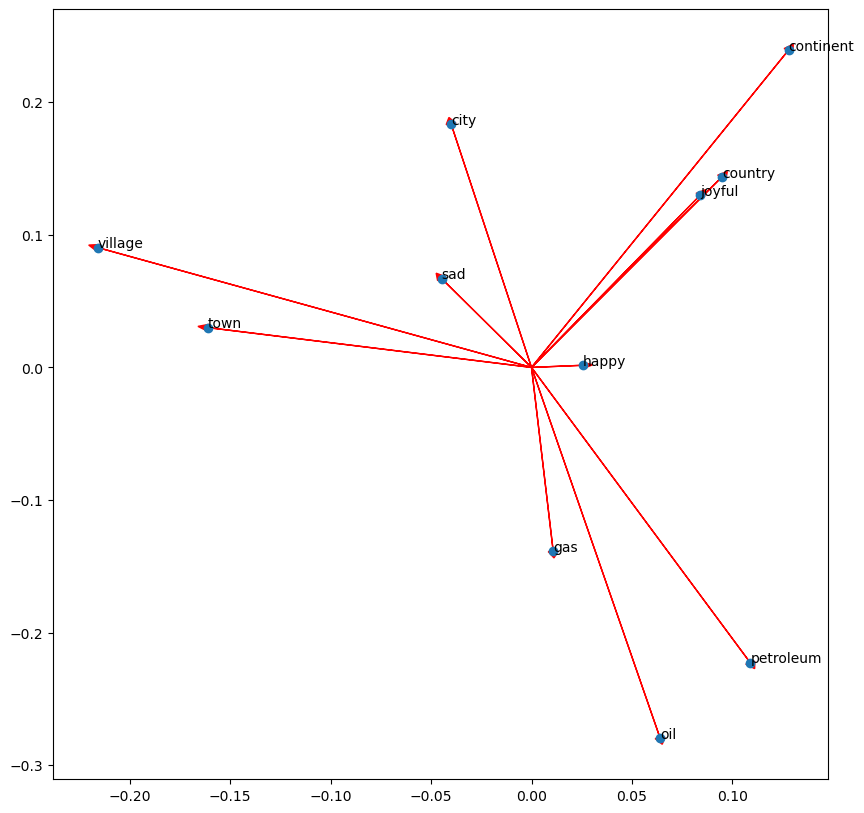

In [12]:
import matplotlib.pyplot as plt
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
def plot_vectors(words, col1, col2):
    fig,ax = plt.subplots(figsize = (10, 10))
    bag2d = np.array([vectorize(word) for word in words])
    print(bag2d)
    for vector in bag2d:
        xval = vector[col1]
        yval = vector[col2]
        ax.arrow(0, 0, xval, yval, head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
    ax.scatter(bag2d[:, col1], bag2d[:, col2])

    for i in range(0, len(words)):
        ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))
    return ax

plot_vectors(words, 3, 2)

In [13]:
def kmostsimilar(word, k, words, word_embeddings=word_embeddings) :
    cosineDistances = []
    for w in words:
        if w != word :
            cosineDistances.append((w, cosineSimilarity(word_embeddings[word], word_embeddings[w])))
    cosineDistances.sort(key = lambda x: x[1], reverse=True)
    return cosineDistances[:2]



In [14]:
print(kmostsimilar('oil',2,words))

[('petroleum', 0.76550657), ('gas', 0.7105981)]


In [15]:
def plotDistance(word1, word2, ax):
    col1 = 3
    col2 = 2
    bag2d = np.array([vectorize(word1), vectorize(word2)])
    for vector in bag2d:
        xval = vector[col1]
        yval = vector[col2]
        ax.arrow(0, 0, xval, yval, head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
    dx = bag2d[1][col1] - bag2d[0][col1]
    dy = bag2d[1][col2] - bag2d[0][col2]
    ax.arrow(bag2d[0][col1], bag2d[0][col2], dx, dy, head_width=0.005, head_length=0.005, fc='b', ec='b', width = 1e-5)
    



[[-0.13964844  0.06225586 -0.27929688 ...  0.20410156  0.23535156
  -0.05102539]
 [-0.16113281  0.10546875 -0.13867188 ...  0.25585938  0.20214844
  -0.01928711]
 [-0.0005188   0.16015625  0.0016098  ... -0.03540039  0.08886719
  -0.30273438]
 ...
 [ 0.02978516  0.25585938  0.23925781 ... -0.06030273  0.19726562
  -0.2734375 ]
 [-0.11865234  0.19921875 -0.22265625 ...  0.09960938  0.20605469
  -0.09912109]
 [ 0.18066406 -0.0090332   0.12988281 ... -0.33984375  0.2734375
   0.04492188]]


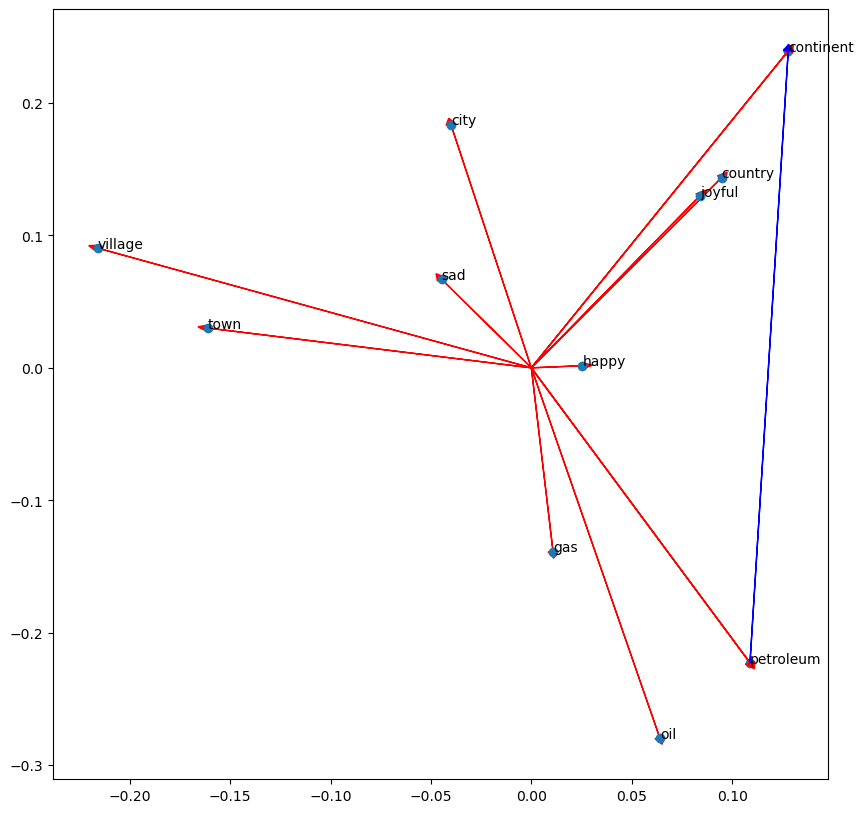

In [16]:
plotDistance('petroleum', 'continent', plot_vectors(words, 3, 2))

In [39]:
from sklearn.decomposition import PCA

def cov(words, num_pcs=2) :
    word_matrix = np.array([vectorize(word) for word in words])
    word_matrix_transpose = word_matrix.T
    for i in range(len(word_matrix_transpose)):
        #print(word_matrix_transpose[i] -  np.mean(word_matrix_transpose[i]))
        word_matrix_transpose[i] = word_matrix_transpose[i] -  np.mean(word_matrix_transpose[i])
        #print(word_matrix_transpose[i])

    #print(np.shape(word_matrix)[0])
    cov_matrix = 1/np.shape(word_matrix)[0] * np.matmul(word_matrix_transpose, word_matrix_transpose.T)
    #eigenvalues = np.linalg.eigvals(cov_matrix)
    eigenvalues,eigenvectors = np.linalg.eig(cov_matrix)
    # Sort the eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    #print(eigenvectors)
    #print(eigenvalues)

    pc_components = {}
    for row,word in zip(word_matrix,words):
        pcs = []
        for i in range(num_pcs):
            pcs.append(np.dot(row,eigenvectors[:,i]))
        pc_components[word] = pcs


        
    #print(f'vectors:{eigenvectors}, values:{eigenvalues}')
    return pc_components
        

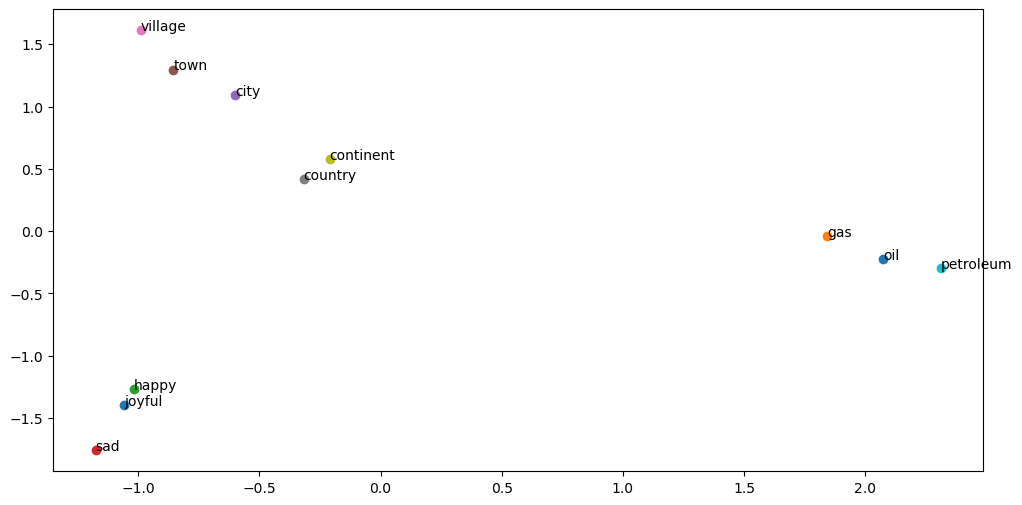

In [40]:
test_array =  np.array([[2.0,3.0],[3.0,4.0],[5.0,6.0],[8.0,9.0]])
words_array = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
word_matrix = np.array([vectorize(word) for word in words_array])

plt.figure(figsize=(12, 6))
p = cov(words_array)
for i in p:
    (x, y) = p.get(i)
    plt.scatter(x, y)
    plt.text(x=x, y=y, s=i)
plt.show()

In [45]:
print(cosineSimilarity(np.array([3,1]),np.array([9,1])))
print(cosineSimilarity(np.array([5,5]),np.array([9,1])))
print(cosineSimilarity(np.array([4,3]),np.array([9,1])))

0.9778024140774093
0.7808688094430302
0.861365903383803
